In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
data=pd.read_csv("games-regression-dataset.csv")
data.head()

,URL,ID,Name,Subtitle,Icon URL,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Average User Rating
0,https://apps.apple.com/us/app/heir-of-light/id...,1264483706,HEIR OF LIGHT,Dark Fantasy RPG,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,982,0.00,"29.99, 19.99, 9.99, 29.99, 29.99, 8.99, 4.99, ...","A Dark Fantasy, Collectible RPG\n\nDarkness ha...",GAMEVIL Inc.,12+,"EN, FR, DE, JA, KO, ZH, ES, TH, ZH, VI",894489600,Games,"Games, Role Playing, Strategy",6/3/2018,31/07/2019,4.0
1,https://apps.apple.com/us/app/endgame-eurasia/...,607705356,Endgame:Eurasia,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,19,0.00,NaN,"""This interactive experience is an exploration...",Auroch Digital Ltd,12+,EN,116407296,Games,"Games, Simulation, Strategy, News",21/03/2013,28/06/2017,3.5
2,https://apps.apple.com/us/app/free-solitaire/i...,627491527,Free Solitaire+,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,14,0.00,NaN,Same Solitaire game with classic Solitaire run...,Chen Zhong Yuan,4+,"EN, ZH",50647040,Games,"Games, Strategy, Entertainment, Card",4/4/2013,21/04/2015,4.5
3,https://apps.apple.com/us/app/draft-trainer/id...,430252596,Draft Trainer,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,88,1.99,NaN,** Discounted for a limited time **\n\nEver wo...,"GG Wizards, LLC",9+,EN,28120064,Games,"Games, Utilities, Card, Strategy",26/05/2011,23/07/2019,3.5
4,https://apps.apple.com/us/app/rogue-knight-inf...,1115082819,Rogue Knight: Infested Lands,Tactical roguelike w/ stealth,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,13,3.99,NaN,Fight or sneak your way through hordes of mons...,Luis Regueira,12+,EN,39915520,Games,"Games, Role Playing, Strategy",19/05/2017,6/2/2019,4.5


In [3]:
X=data.drop('Average User Rating',axis=1)
y=data['Average User Rating']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=2)

In [5]:
train_data=pd.concat([X_train,y_train],axis='columns')
test_data=pd.concat([X_test,y_test],axis='columns')


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4171 entries, 253 to 2575
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           4171 non-null   object 
 1   ID                            4171 non-null   int64  
 2   Name                          4171 non-null   object 
 3   Subtitle                      1167 non-null   object 
 4   Icon URL                      4171 non-null   object 
 5   User Rating Count             4171 non-null   int64  
 6   Price                         4171 non-null   float64
 7   In-app Purchases              2535 non-null   object 
 8   Description                   4171 non-null   object 
 9   Developer                     4171 non-null   object 
 10  Age Rating                    4171 non-null   object 
 11  Languages                     4161 non-null   object 
 12  Size                          4171 non-null   int64  
 13  P

In [7]:
train_data.shape

(4171, 18)

In [8]:
train_data.describe()

,ID,User Rating Count,Price,Size,Average User Rating
count,4.171000e+03,4.171000e+03,4171.000000,4.171000e+03,4171.000000
mean,8.661515e+08,4.145890e+03,0.602407,1.381858e+08,4.031287
std,2.945126e+08,5.543394e+04,2.730678,2.554433e+08,0.752720
min,2.849214e+08,5.000000e+00,0.000000,2.158400e+05,1.000000
25%,5.952646e+08,1.300000e+01,0.000000,2.761677e+07,3.500000
50%,9.177783e+08,5.000000e+01,0.000000,6.700851e+07,4.000000
75%,1.112485e+09,3.380000e+02,0.000000,1.591173e+08,4.500000
max,1.341837e+09,3.032734e+06,139.990000,4.005591e+09,5.000000


In [9]:
train_data.isnull().sum().sort_values(ascending=False)

Subtitle                        3004
In-app Purchases                1636
Languages                         10
URL                                0
Age Rating                         0
Current Version Release Date       0
Original Release Date              0
Genres                             0
Primary Genre                      0
Size                               0
Developer                          0
ID                                 0
Description                        0
Price                              0
User Rating Count                  0
Icon URL                           0
Name                               0
Average User Rating                0
dtype: int64

In [10]:
train_data.drop(['Subtitle','In-app Purchases'],axis=1,inplace=True)

In [11]:
train_data['Languages'].fillna(train_data['Languages'].mode()[0], inplace=True)

In [12]:
train_data.duplicated().sum()
#remove them

25

In [13]:
train_data.drop_duplicates(inplace=True)

# EDA

<Axes: xlabel='Average User Rating', ylabel='count'>

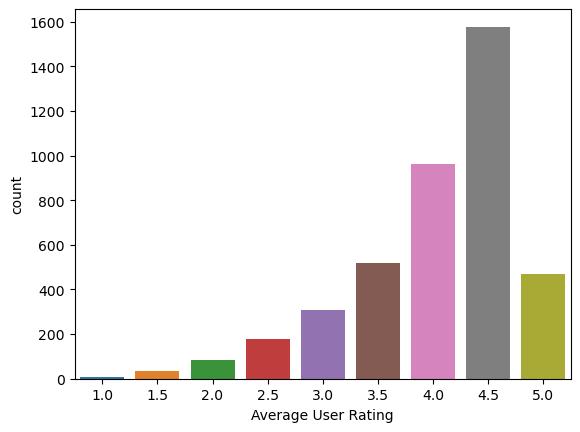

In [14]:
sns.countplot(x=train_data['Average User Rating'])

Left skewed

<Axes: xlabel='Age Rating', ylabel='count'>

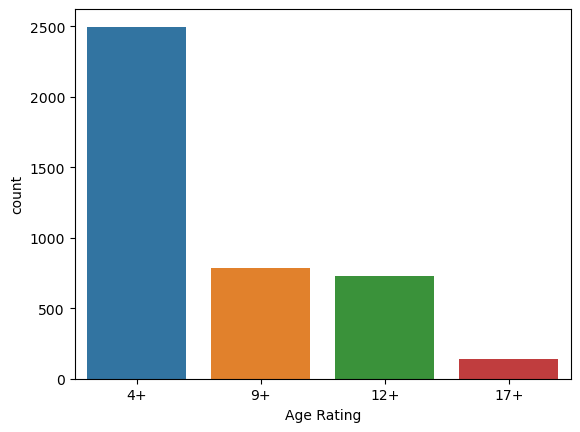

In [15]:
sns.countplot(x=train_data['Age Rating'])

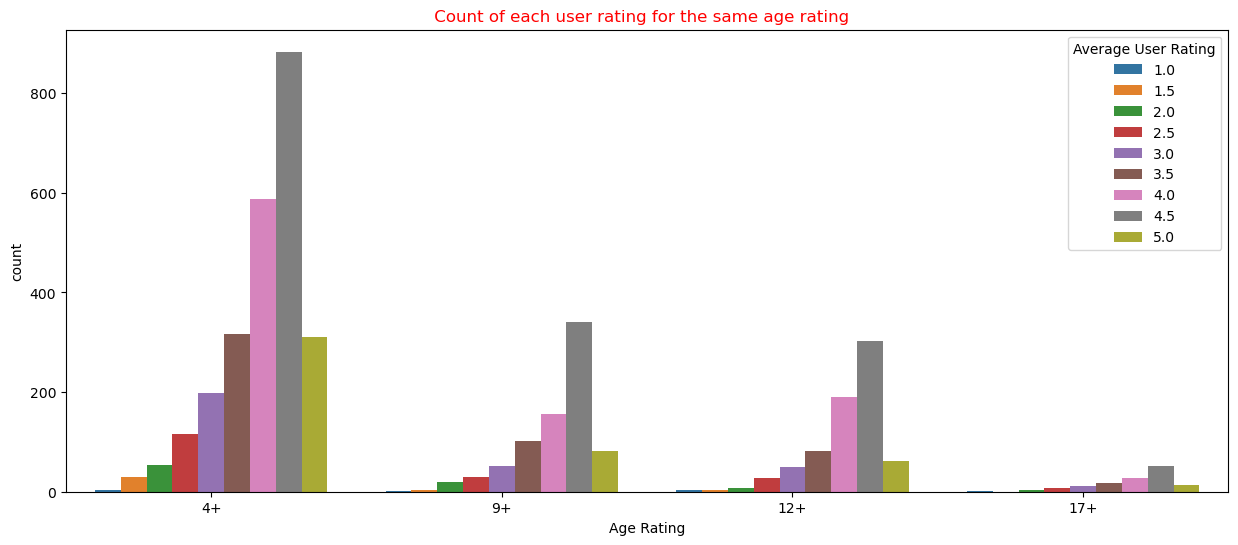

In [16]:
plt.figure(figsize=(15,6))
ax = sns.countplot(x ='Age Rating',hue='Average User Rating', data = train_data)
plt.title(" Count of each user rating for the same age rating   ",color="red");

disturbation is the same in all Age ratings >>> Not affected

/tmp/ipykernel_91910/3402204457.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Size'])


<Axes: xlabel='Size', ylabel='Density'>

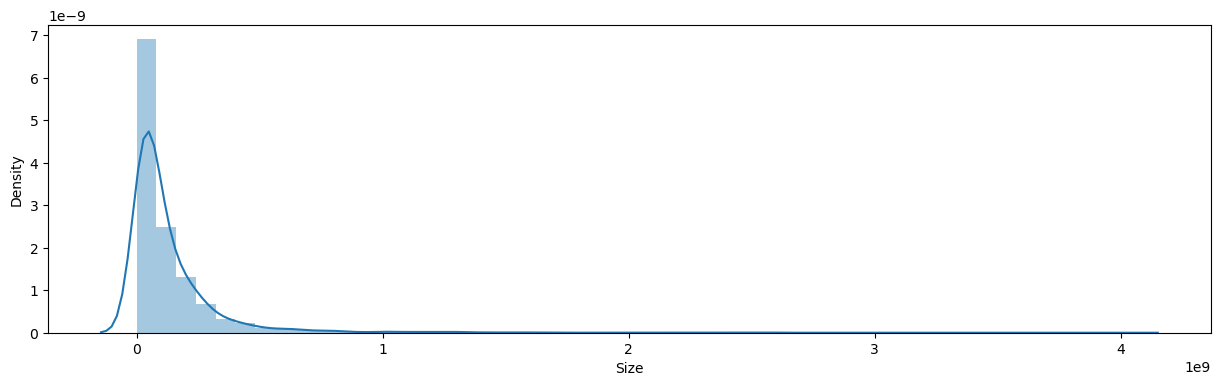

In [17]:
plt.figure(figsize=(15,4))
sns.distplot(train_data['Size'])

In [18]:
Q1 = train_data['Size'].quantile(0.25)
Q3 = train_data['Size'].quantile(0.75)

x1=train_data[train_data['Size']<Q1]
x2=train_data[(train_data['Size']>Q1) & (train_data['Size']<Q3)]
x3=train_data[train_data['Size']>Q3]


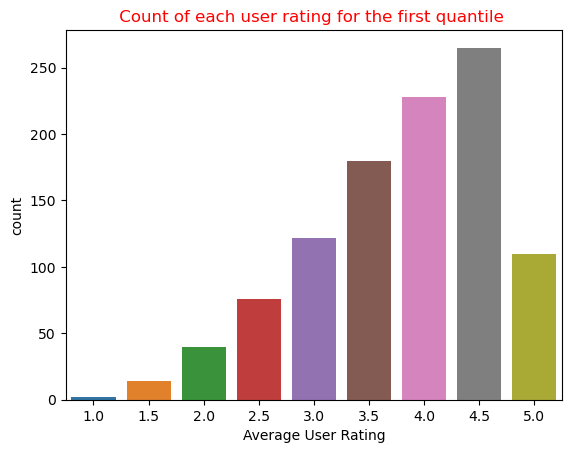

In [19]:
sns.countplot(x=x1['Average User Rating'])
plt.title(" Count of each user rating for the first quantile  ",color="red");

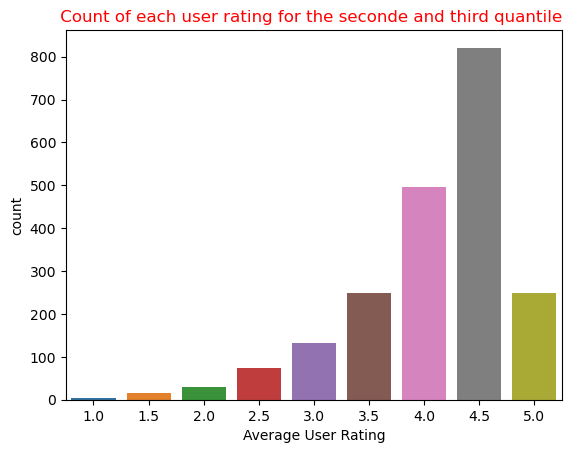

In [20]:
sns.countplot(x=x2['Average User Rating'])
plt.title(" Count of each user rating for the seconde and third quantile  ",color="red");

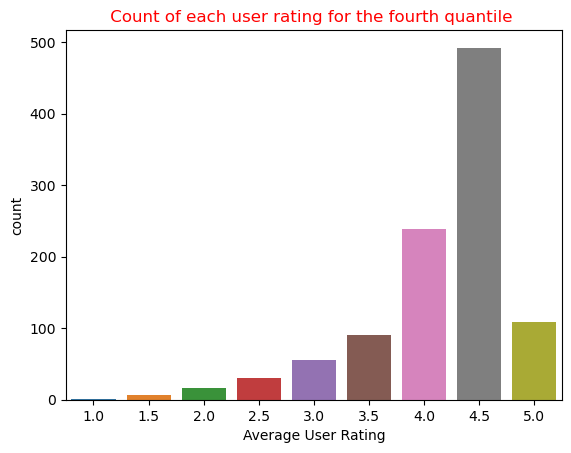

In [21]:
sns.countplot(x=x3['Average User Rating'])
plt.title(" Count of each user rating for the fourth quantile  ",color="red");

/tmp/ipykernel_91910/3217389885.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Price'])


<Axes: xlabel='Price', ylabel='Density'>

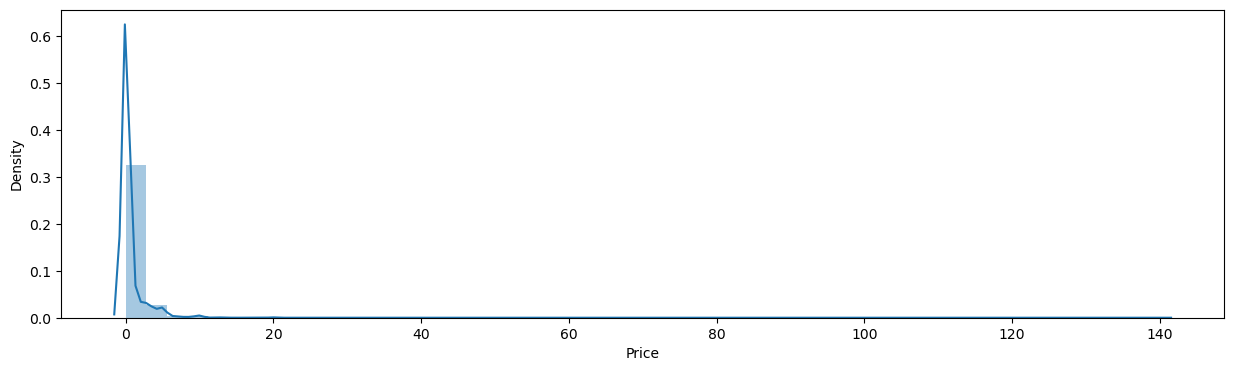

In [22]:
plt.figure(figsize=(15,4))
sns.distplot(train_data['Price'])

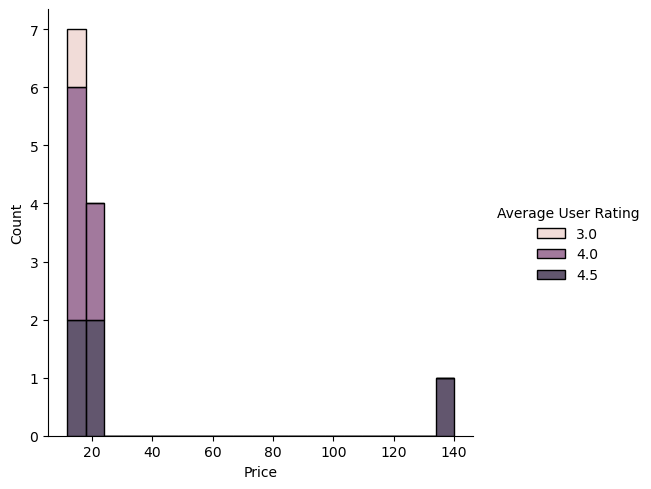

In [23]:
u=train_data[train_data['Price']>10]
sns.displot(data=u, x="Price", hue="Average User Rating", multiple="stack")

In [24]:
len(u)

12

If price increasing does it affect to Average user rating>>>>conclusion inc price inc Average directly porpointal

low no of row doesn't affect

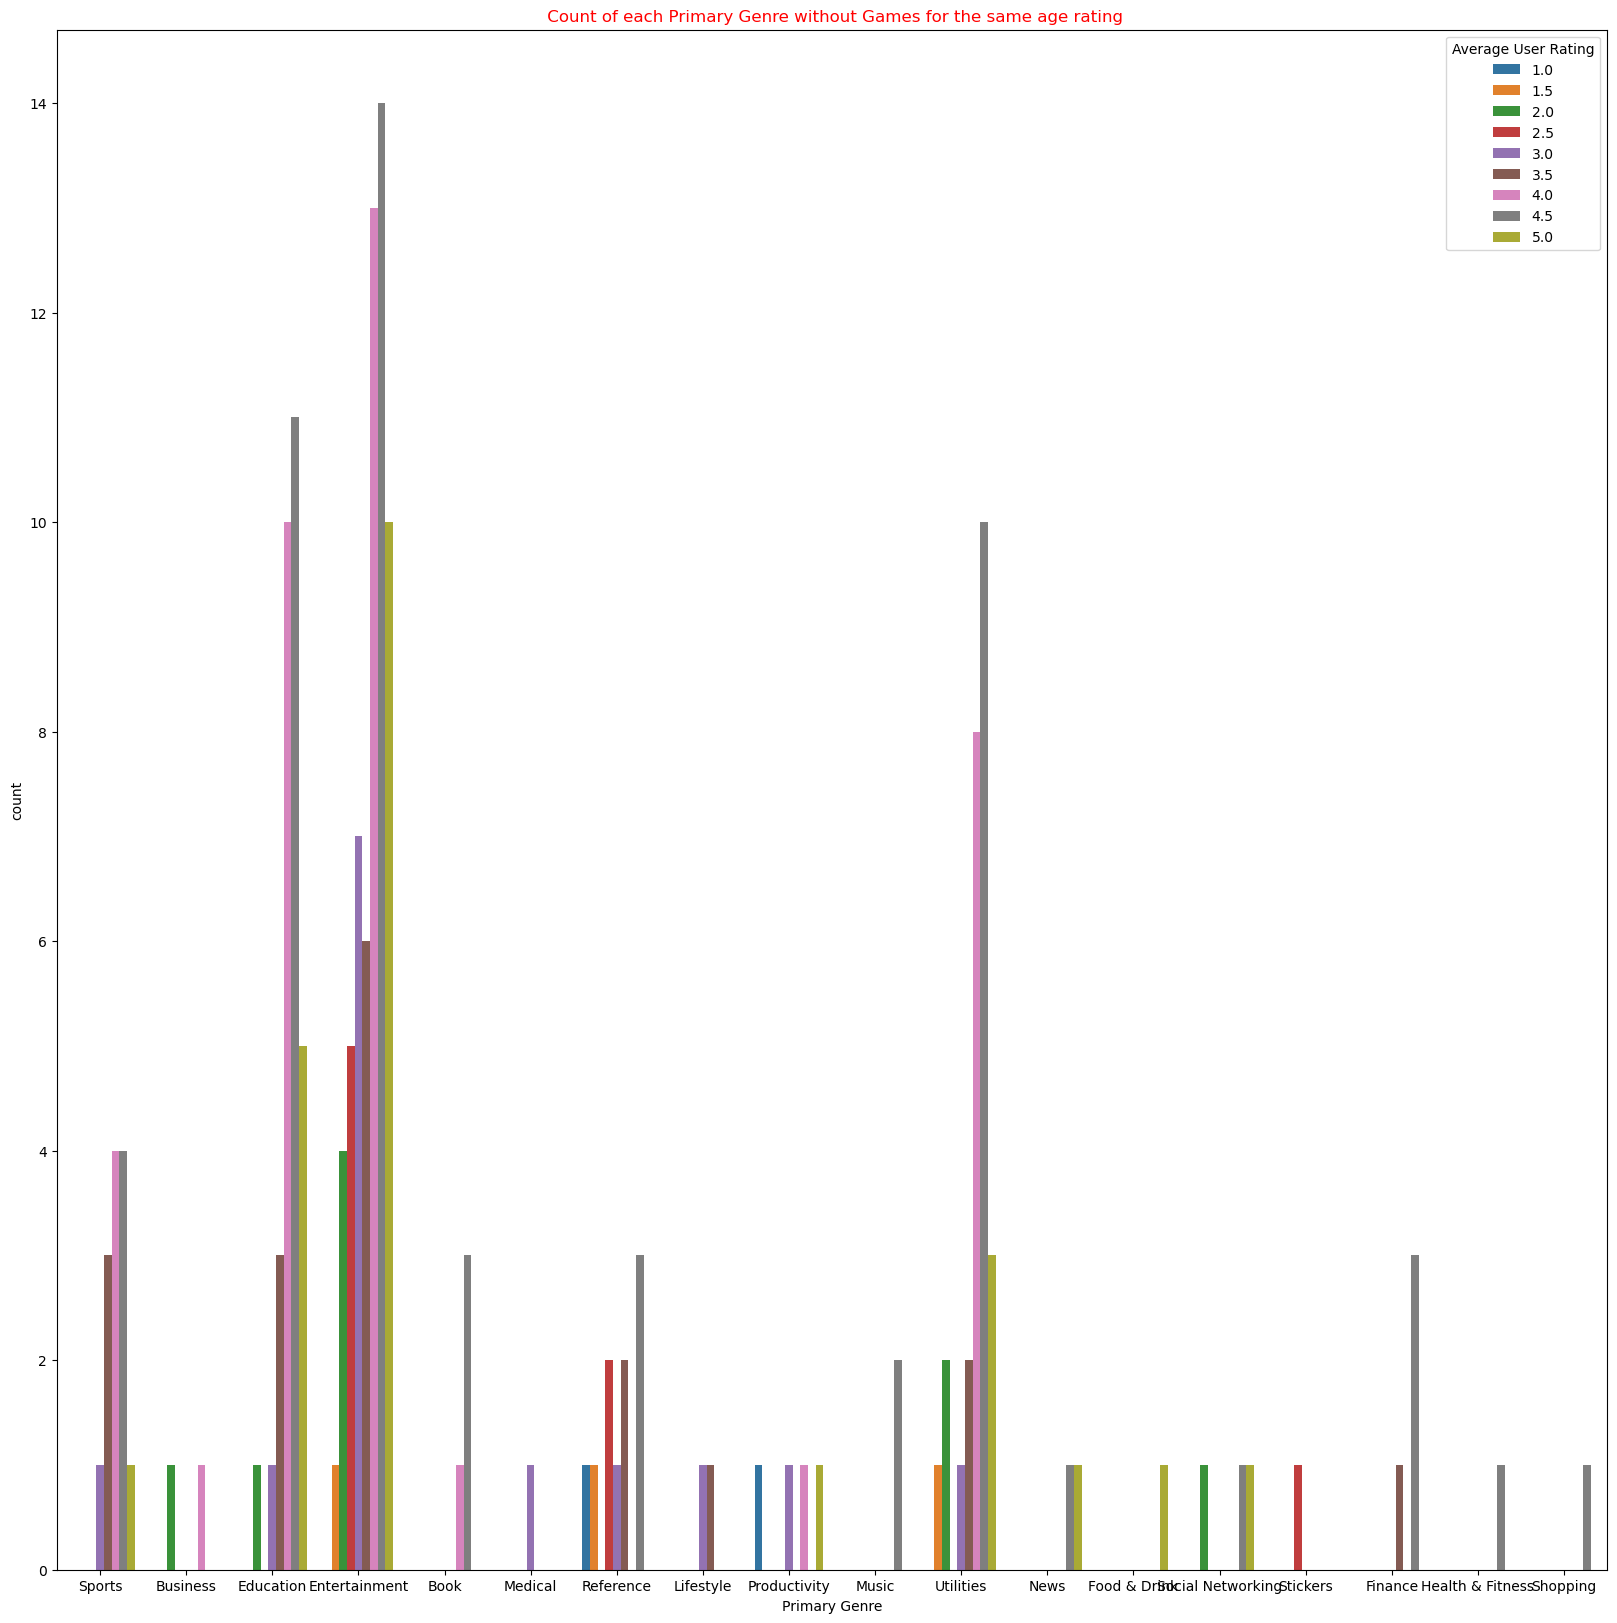

In [25]:
plt.figure(figsize=(20,20))
u=train_data.loc[(train_data["Primary Genre"]!='Games')]

ax = sns.countplot(x ='Primary Genre',hue='Average User Rating', data = u)
plt.title(" Count of each Primary Genre without Games for the same age rating",color="red");

Outliers Detected

In [26]:
len(u)

169

In [27]:
# data['Original Release Date']=pd.to_datetime(data["Original Release Date"], dayfirst=True)
# data['Current Version Release Date']=pd.to_datetime(data["Current Version Release Date"], dayfirst=True)

# data['Original Release Year']=data['Original Release Date'].dt.year
# data['Current Version Release Year']=data['Current Version Release Date'].dt.year


# data.drop(['Original Release Date','Current Version Release Date'],axis=1,inplace=True)
#  plt.figure(figsize=(15,10))
# ax = sns.countplot(x ='Original Release Year',hue='Average User Rating', data = data)
# plt.title(" User Rating for each year   ",color="red");

In [28]:
train_data['Original Release Date'] = pd.to_datetime(train_data['Original Release Date'],dayfirst=True).astype('datetime64[ns]').astype('int64')
train_data['Current Version Release Date'] = pd.to_datetime(train_data['Current Version Release Date'],dayfirst=True).astype('datetime64[ns]').astype('int64')

In [29]:
train_data['Age Rating']=train_data['Age Rating'].str.replace('+', '')
train_data['Age Rating']=train_data['Age Rating'].apply(pd.to_numeric)
train_data['Age Rating']

/tmp/ipykernel_91910/2599777923.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train_data['Age Rating']=train_data['Age Rating'].str.replace('+', '')


253      4
2592     9
1605     4
4661     4
2        4
        ..
3335     4
1099     4
2514     4
3606    12
2575     4
Name: Age Rating, Length: 4146, dtype: int64

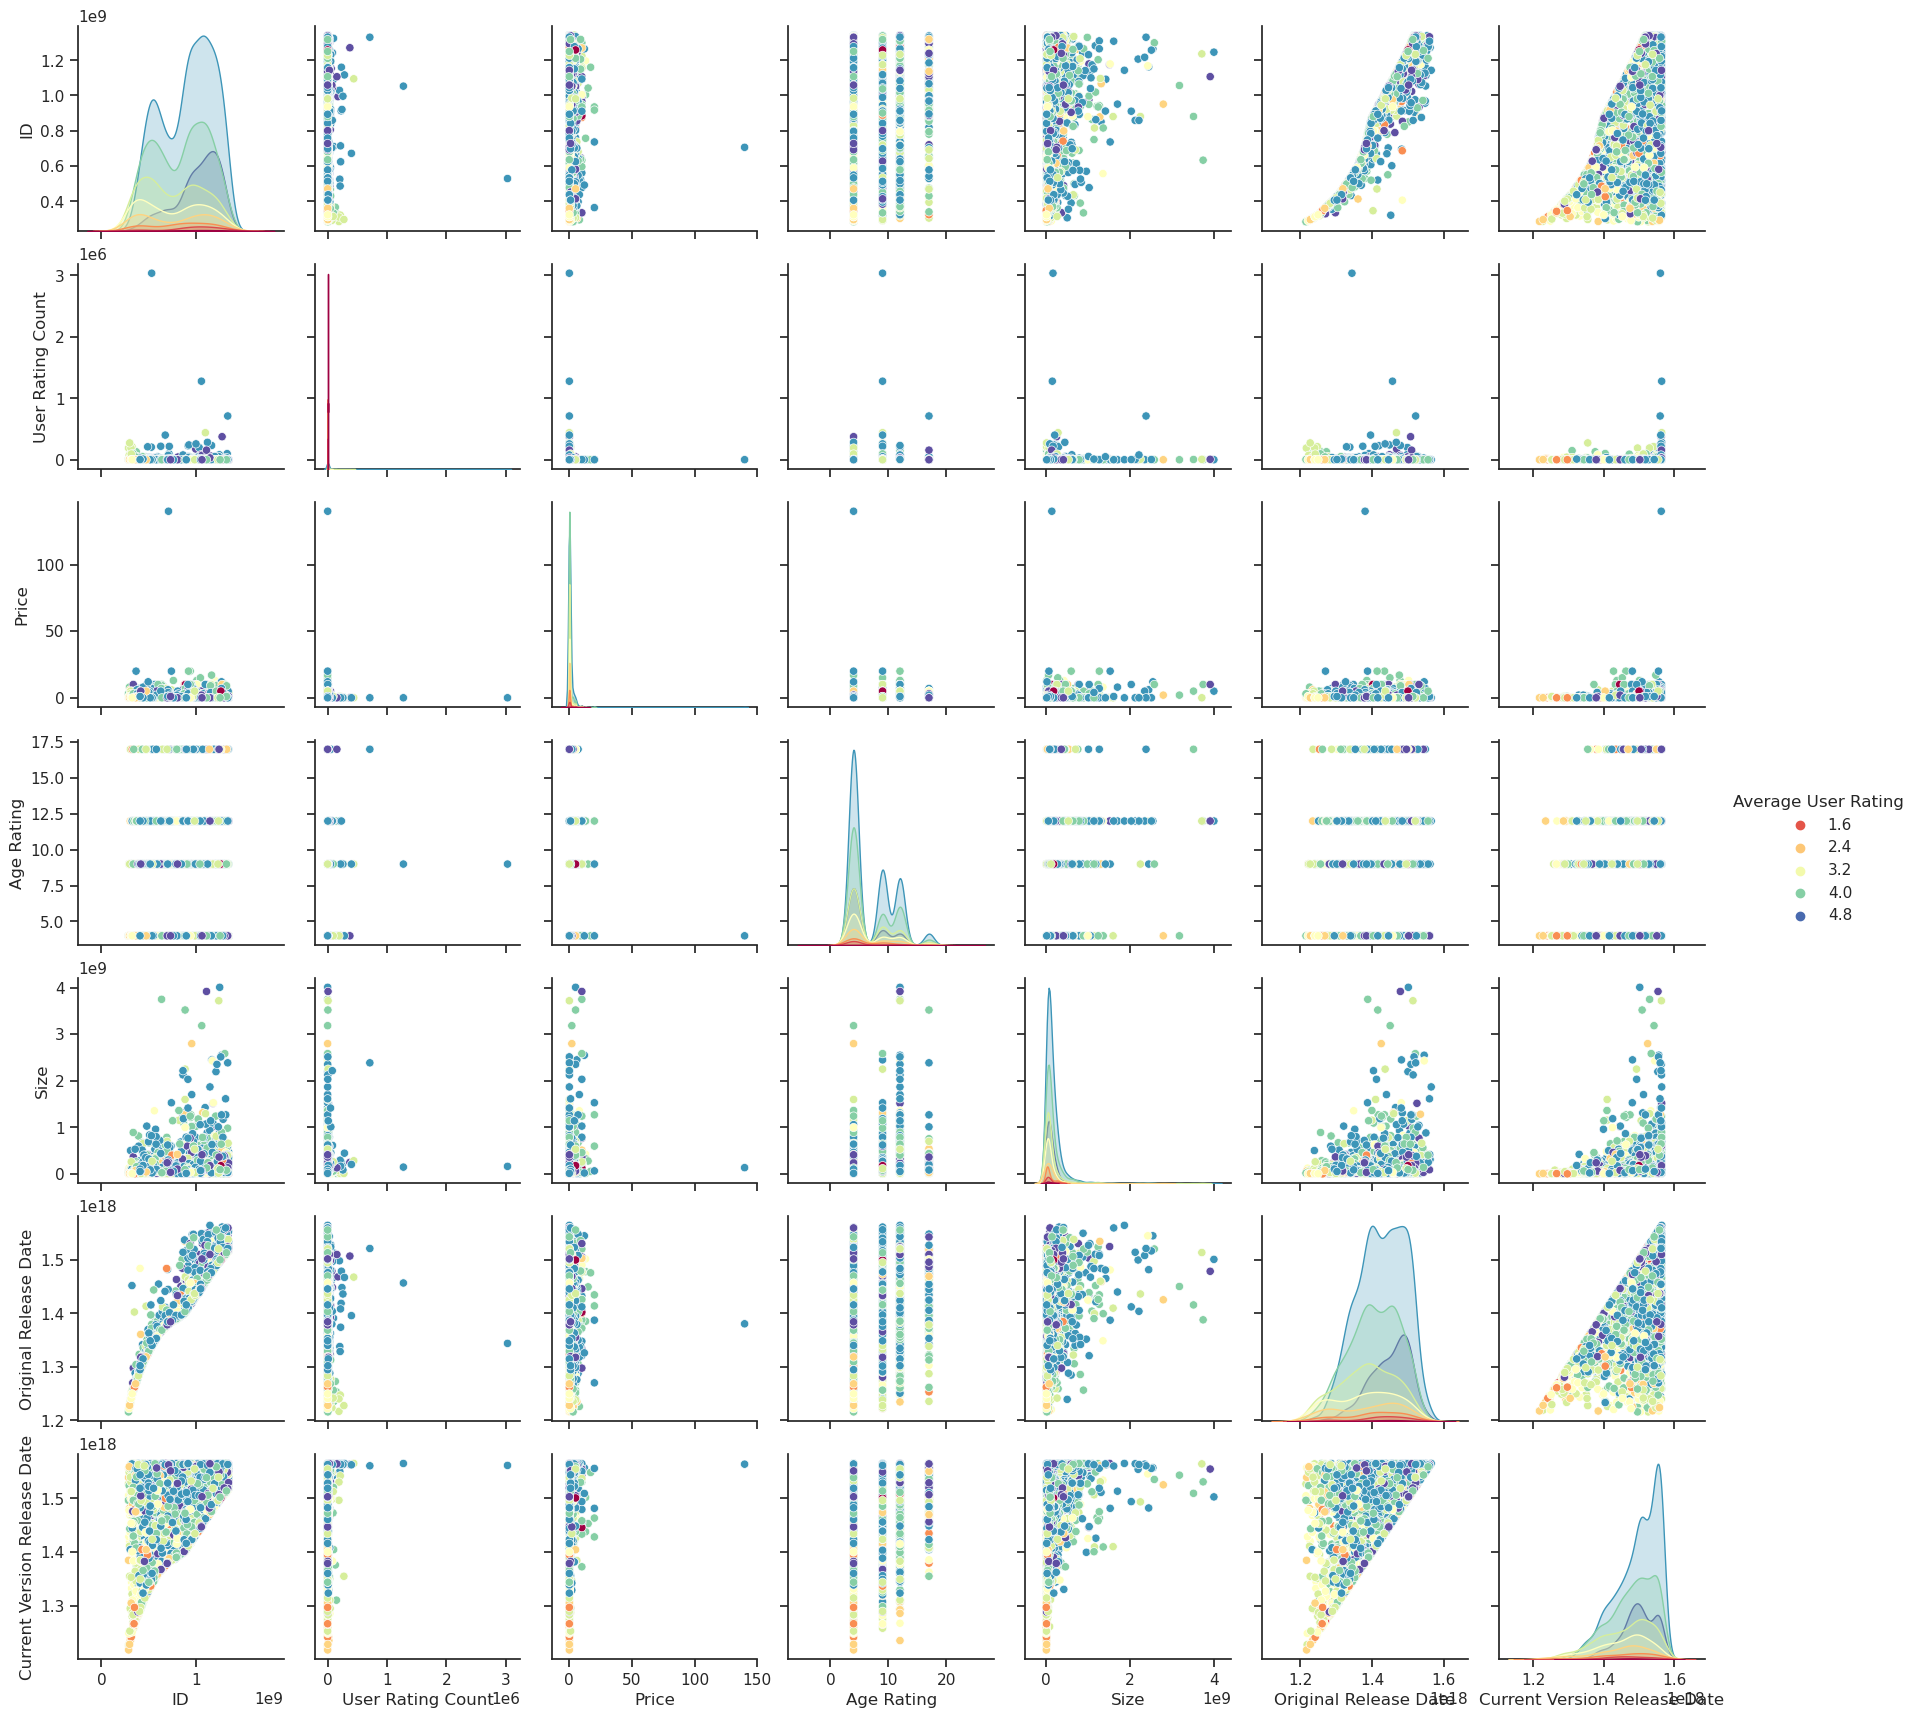

In [30]:
sns.set_theme(style="ticks")
sns.pairplot(train_data, hue="Average User Rating",palette="Spectral")

/tmp/ipykernel_91910/3470809464.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True)


<Axes: >

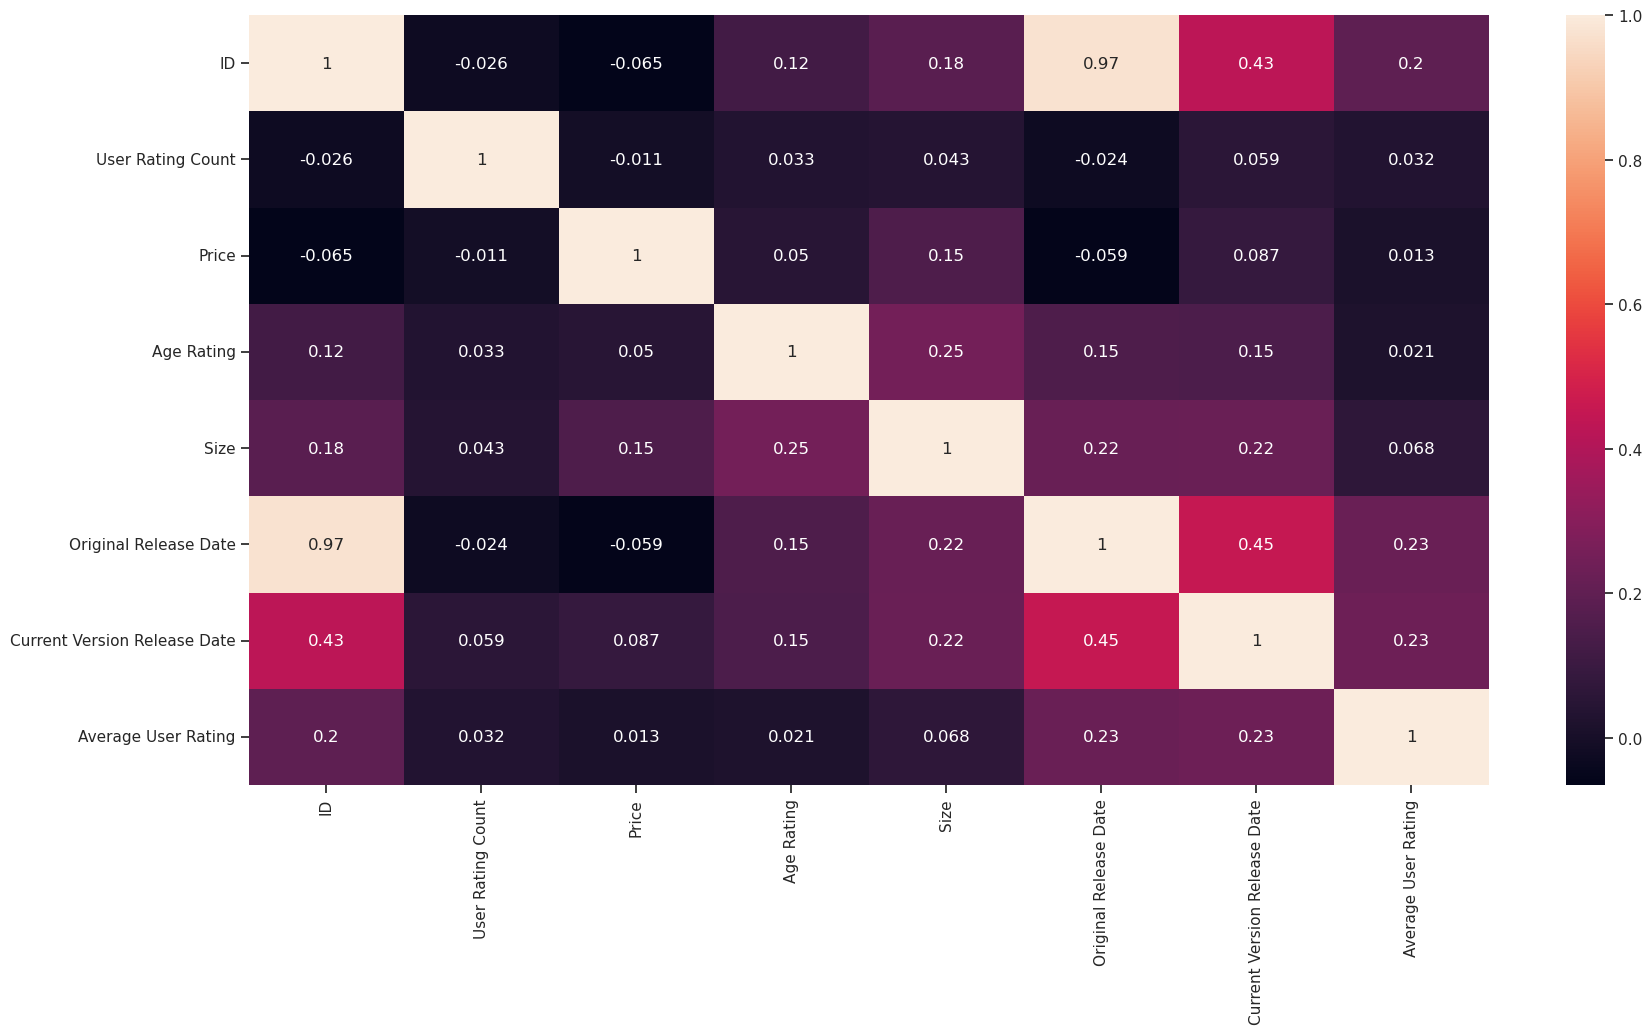

In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(train_data.corr(),annot=True)

In [32]:
train_data['Developer'].value_counts()

Tapps Tecnologia da Informa\xe7\xe3o Ltda.    78
Detention Apps                                27
HexWar Games Ltd                              22
EASY Inc.                                     19
Qumaron                                       19
                                              ..
Etcetera Edutainment, Inc.                     1
Laylo Inc.                                     1
Jabatoba AB                                    1
Superbrightly Studio LLC                       1
Helen Cheng                                    1
Name: Developer, Length: 2607, dtype: int64

In [33]:
train_data['Name'].is_unique

True

In [34]:
train_data['ID'].is_unique

True

In [35]:
train_data['URL'].is_unique

True

In [36]:
train_data['Icon URL'].is_unique

True

In [37]:
train_data['Rating']=train_data['Average User Rating']
train_data['Primary']=train_data['Primary Genre']


In [38]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Rating ~ Developer', data=train_data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Developer,1916.945411,2606.0,2.676255,4.014932e-93
Residual,423.005927,1539.0,NaN,NaN


In [39]:
model = ols('Rating ~ Primary', data=train_data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Primary,25.311150,18.0,2.507208,0.000418
Residual,2314.640189,4127.0,NaN,NaN


In [40]:
model = ols('Rating ~ Languages', data=train_data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Languages,281.905517,505.0,0.987321,0.568567
Residual,2058.045821,3640.0,NaN,NaN


In [41]:
model = ols('Rating ~ Genres', data=train_data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Genres,313.728820,454.0,1.258796,0.00035
Residual,2026.222519,3691.0,NaN,NaN


In [42]:
train_data.drop(['URL','Icon URL','Name','ID','Description','Languages','Rating','Primary','User Rating Count','Price','Age Rating','Size'],axis=1,inplace=True)
#data.drop(['URL','Icon URL','Name','ID','Description','Languages'],axis=1,inplace=True)

In [43]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4146 entries, 253 to 2575
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Developer                     4146 non-null   object 
 1   Primary Genre                 4146 non-null   object 
 2   Genres                        4146 non-null   object 
 3   Original Release Date         4146 non-null   int64  
 4   Current Version Release Date  4146 non-null   int64  
 5   Average User Rating           4146 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 226.7+ KB


In [44]:
def one_hot_encoding(data,to_be_hot_encoded):
    list_all_unique = []
    # Get New Columns Names.
    for feature in to_be_hot_encoded:
        unique_values = set()
        for i in range(0, len(data)):
            cell = data[feature].iloc[i]  # Equivalent to X[feature][i]
            if not pd.isnull(cell):
                valuesList = cell.split(',')  # ex -> valuesList = [En, Fr, Da, SP]
                for value in valuesList:
                    unique_values.add(value)

        for item in unique_values:
            list_all_unique.append(item)

    returned=update_with_new_columns(data,list_all_unique,to_be_hot_encoded)
    return returned,list_all_unique

In [45]:
def update_with_new_columns(data,list_all_unique,to_be_hot_encoded):
    # Add New Columns.
    updated_data = data
    updated_data = updated_data.reset_index(drop=True)
    for value in list_all_unique:
        new_column_arr = np.zeros(len(data))
        new_column_df = pd.Series(new_column_arr, name=value)
        updated_data = pd.concat([updated_data, new_column_df], axis=1)

    # Remove Old Columns
    for feature in to_be_hot_encoded:
        updated_data.drop(feature, axis=1, inplace=True)

    # Add Ones in the right columns.
    for feature in to_be_hot_encoded:
        for i in range(0, len(data)):
            cell = data[feature].iloc[i]
            if not pd.isnull(cell):
                valuesList = cell.split(',')
                for value in valuesList:
                    if value in updated_data: # Check if 'value' is seen in training operation.     #else: ignore it.
                        value_i = updated_data.columns.get_loc(value)
                        updated_data.iloc[i, value_i] = 1

    # Update.
    return updated_data

In [46]:
traain,list_unquie_train=one_hot_encoding(train_data,['Genres','Developer','Primary Genre'])

In [47]:
from sklearn.ensemble import IsolationForest

model_IF = IsolationForest(contamination=float(0.1))
model_IF.fit(traain)

/opt/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1)

In [48]:
traain['anomaly'] = model_IF.predict(traain)
#train_data['anomaly_scores'] = model_IF.decision_function(train_data)

In [49]:
# anomaly=train_data.loc[train_data['anomaly']==-1]
# anomaly_index=list(anomaly.index)
# print(anomaly)

In [50]:
data_without_outliers=traain.loc[traain['anomaly']!=-1]

In [51]:
X_train=data_without_outliers.drop(['Average User Rating','anomaly'],axis=1)
y_train=data_without_outliers['Average User Rating']

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)

In [53]:
test_data.drop(['Subtitle','In-app Purchases','URL','Icon URL','Name','ID','Description','Languages','User Rating Count','Price','Age Rating','Size'],axis=1,inplace=True)


In [54]:
test_data['Original Release Date'] = pd.to_datetime(test_data['Original Release Date'],dayfirst=True).astype('datetime64[ns]').astype('int64')
test_data['Current Version Release Date'] = pd.to_datetime(test_data['Current Version Release Date'],dayfirst=True).astype('datetime64[ns]').astype('int64')

In [55]:
test_data.isnull().sum().sort_values(ascending=False)

Developer                       0
Primary Genre                   0
Genres                          0
Original Release Date           0
Current Version Release Date    0
Average User Rating             0
dtype: int64

In [56]:
teest=update_with_new_columns(test_data,list_unquie_train,['Genres','Developer','Primary Genre'])

In [57]:
X_test=teest.drop(['Average User Rating'],axis=1)
y_test=teest['Average User Rating']

In [58]:
X_test_std = sc.transform(X_test)

In [59]:
X_train_std.shape

(3733, 2722)

In [60]:
X_test_std.shape

(1043, 2722)

## Grid search

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

scoring = make_scorer(mean_squared_error, greater_is_better=False)

def grid_search (estimator, id ,param_grid):

    g_search = GridSearchCV(
    estimator= estimator,
    param_grid= param_grid,
    scoring = scoring,
    cv=5
    )

    g_search.fit(X_train_std, y_train)

    print(f"{id}  BESt ESTIMATOR: {g_search.best_estimator_}")
    print(f"{id}  BEST PARAMETERS: {g_search.best_params_}")
    print(f"{id}  BEST SCORE: {g_search.best_score_}")


## $\text{XGB}$

In [62]:
import xgboost as xg

xgb_regressor = xg.XGBRegressor(objective ='reg:linear', seed = 123)

param_grid = {
"n_estimators": [200, 900], 
"max_depth": [5, 10]
}

grid_search(xgb_regressor, "XGB", param_grid)


[22:34:19] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:34:44] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:35:02] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:35:28] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:35:48] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:36:12] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


KeyboardInterrupt: 

## $\text{Lasso Regression}$

In [ ]:
from sklearn.linear_model import Lasso

lasso_regressor = Lasso()

param_grid = {
   "alpha": [0.001, 0.1 , 1, 1.5],
   "fit_intercept": [True, False]
}

grid_search(lasso_regressor, "Lasso Regression", param_grid)

/opt/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.510e+00, tolerance: 5.057e+00
  model = cd_fast.enet_coordinate_descent(


Lasso Regression  BESt ESTIMATOR: Lasso(alpha=0.001)
Lasso Regression  BEST PARAMETERS: {'alpha': 0.001, 'fit_intercept': True}
Lasso Regression  BEST SCORE: -0.4727765492020426


## $\text{Linear Regression}$

In [63]:
from sklearn.linear_model import LinearRegression

lr_regressor = LinearRegression()

lr_regressor.fit(X_train, y_train)

y_pred_test = lr_regressor.predict(X_test)

print('Mean Square Error: ', metrics.mean_squared_error(y_test, y_pred_test))


Mean Square Error:  0.5159442093915972


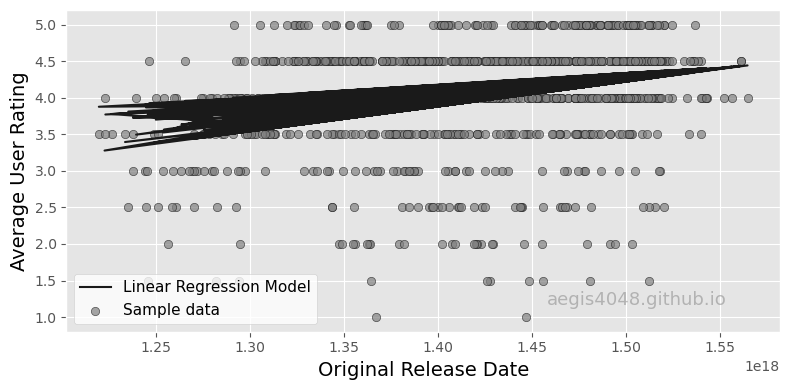

In [64]:
xd = X_test["Original Release Date"]

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(xd, y_pred_test, color='k', label='Linear Regression Model')
ax.scatter(xd, y_test, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Average User Rating', fontsize=14)
ax.set_xlabel('Original Release Date', fontsize=14)
ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)

fig.tight_layout()



## $\text{Decision Tree}$

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor()

param_grid = {
    "max_depth": [None, 4, 5, 7, 9, 12, 15, 20, 25, 30],
    "splitter": ["best", "random"],
}

grid_search(dt_regressor, "Decision Tree", param_grid)



Decision Tree  BESt ESTIMATOR: DecisionTreeRegressor(max_depth=12, splitter='random')
Decision Tree  BEST PARAMETERS: {'max_depth': 12, 'splitter': 'random'}
Decision Tree  BEST SCORE: -0.4924750144958409


## $\text{Random Forest}$

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=300, max_depth= 5)

rf_regressor.fit(X_train_std, y_train)

y_pred_test = rf_regressor.predict(X_test_std)

print('Mean Square Error: ', metrics.mean_squared_error(y_test, y_pred_test))

Mean Square Error:  0.4870649988472376


## $\text{Best Models}$

## $\text{XGB}$

In [ ]:
xgb_regressor = xg.XGBRegressor(objective ='reg:linear', n_estimators = 900, max_depth = 5, seed = 123)

xgb_regressor.fit(X_train_std, y_train)

y_pred_test = xgb_regressor.predict(X_test_std)

print('Mean Square Error: ', metrics.mean_squared_error(y_test, y_pred_test))

[15:25:26] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Mean Square Error:  0.4364058167245837


## $\text{SVR}$

In [ ]:
from sklearn.svm import SVR

svr_regressor = SVR(kernel='sigmoid')

svr_regressor.fit(X_train_std, y_train)

y_pred_test = svr_regressor.predict(X_test_std)

print('Mean Square Error: ', metrics.mean_squared_error(y_test, y_pred_test))

Mean Square Error:  0.4676278131452984
